In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import scipy
import shapely
import matplotlib.pyplot as plt

In [2]:
geo_df = gpd.read_file("../datasets/raw_data/ZIP_Codes/ZIP_Codes.shp").to_crs(epsg=4326)

In [3]:
geo_df.head()

,OBJECTID,ZIP5,ShapeSTAre,ShapeSTLen,geometry
0,1,02134,3.721936e+07,40794.182396,"POLYGON ((-71.12340 42.36421, -71.12332 42.363..."
1,2,02125,6.476052e+07,62224.521440,"POLYGON ((-71.04541 42.32381, -71.04472 42.323..."
2,3,02110,6.637284e+06,18358.213496,"POLYGON ((-71.05109 42.36418, -71.04960 42.364..."
3,4,02118,3.116158e+07,32353.407618,"POLYGON ((-71.06315 42.34689, -71.06304 42.346..."
4,5,02126,6.078585e+07,45488.394711,"POLYGON ((-71.09670 42.29095, -71.09641 42.290..."


In [4]:
geo_df.dtypes

OBJECTID         int64
ZIP5            object
ShapeSTAre     float64
ShapeSTLen     float64
geometry      geometry
dtype: object

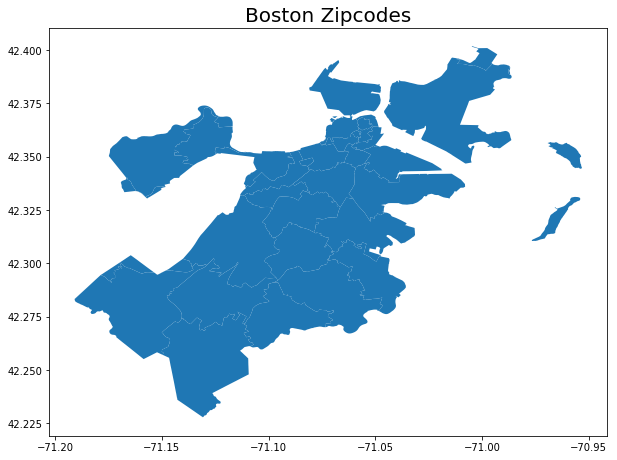

In [5]:
fig, ax = plt.subplots(figsize = (10, 10))
geo_df.plot(ax = ax);
ax.set_title('Boston Zipcodes', fontsize = 20);

In [6]:
clean_tweets_df = pd.read_csv("../datasets/clean_tweets.csv")
clean_tweets_df.head()

,Unnamed: 0,username,text,label,dates,clean_text,target,lat,long,zip
0,326,Amithridya1001,No update or action on supply issue at near 2 ...,outage,2019-07-23,update action supply issue near still even cus...,1,42.351035,-71.035541,2128
1,327,ellensweeps,I live in what is considered the largest conce...,outage,2019-07-23,live considered largest concentrated outage ma...,1,42.375944,-71.120042,2111
2,328,CoxHelp,"No, there is not an outage and your modem is r...",outage,2019-07-23,outage modem receiving signal us reset modem f...,1,42.361009,-71.048155,2199
3,329,Steven_McKie,No big deal @Xfinity I didn’t have to work tod...,outage,2019-07-23,big deal xfinity work today anything outage ni...,1,42.332771,-71.027762,2135
4,330,Larapic,So we filled the Adpt with post-its today and ...,outage,2019-07-23,filled adpt post today second outage ended dis...,1,42.348956,-71.025861,2132


In [7]:
clean_tweets_df.shape

(1491, 10)

In [8]:
clean_tweets_df.drop( columns= "Unnamed: 0", axis = 1 , inplace = True)

In [9]:
clean_tweets_df.head()

,username,text,label,dates,clean_text,target,lat,long,zip
0,Amithridya1001,No update or action on supply issue at near 2 ...,outage,2019-07-23,update action supply issue near still even cus...,1,42.351035,-71.035541,2128
1,ellensweeps,I live in what is considered the largest conce...,outage,2019-07-23,live considered largest concentrated outage ma...,1,42.375944,-71.120042,2111
2,CoxHelp,"No, there is not an outage and your modem is r...",outage,2019-07-23,outage modem receiving signal us reset modem f...,1,42.361009,-71.048155,2199
3,Steven_McKie,No big deal @Xfinity I didn’t have to work tod...,outage,2019-07-23,big deal xfinity work today anything outage ni...,1,42.332771,-71.027762,2135
4,Larapic,So we filled the Adpt with post-its today and ...,outage,2019-07-23,filled adpt post today second outage ended dis...,1,42.348956,-71.025861,2132


In [10]:
clean_gdf = gpd.GeoDataFrame(clean_tweets_df, 
                            geometry=gpd.points_from_xy(clean_tweets_df.long, 
                                                        clean_tweets_df.lat))

In [11]:
clean_gdf.head()

,username,text,label,dates,clean_text,target,lat,long,zip,geometry
0,Amithridya1001,No update or action on supply issue at near 2 ...,outage,2019-07-23,update action supply issue near still even cus...,1,42.351035,-71.035541,2128,POINT (-71.03554 42.35103)
1,ellensweeps,I live in what is considered the largest conce...,outage,2019-07-23,live considered largest concentrated outage ma...,1,42.375944,-71.120042,2111,POINT (-71.12004 42.37594)
2,CoxHelp,"No, there is not an outage and your modem is r...",outage,2019-07-23,outage modem receiving signal us reset modem f...,1,42.361009,-71.048155,2199,POINT (-71.04816 42.36101)
3,Steven_McKie,No big deal @Xfinity I didn’t have to work tod...,outage,2019-07-23,big deal xfinity work today anything outage ni...,1,42.332771,-71.027762,2135,POINT (-71.02776 42.33277)
4,Larapic,So we filled the Adpt with post-its today and ...,outage,2019-07-23,filled adpt post today second outage ended dis...,1,42.348956,-71.025861,2132,POINT (-71.02586 42.34896)


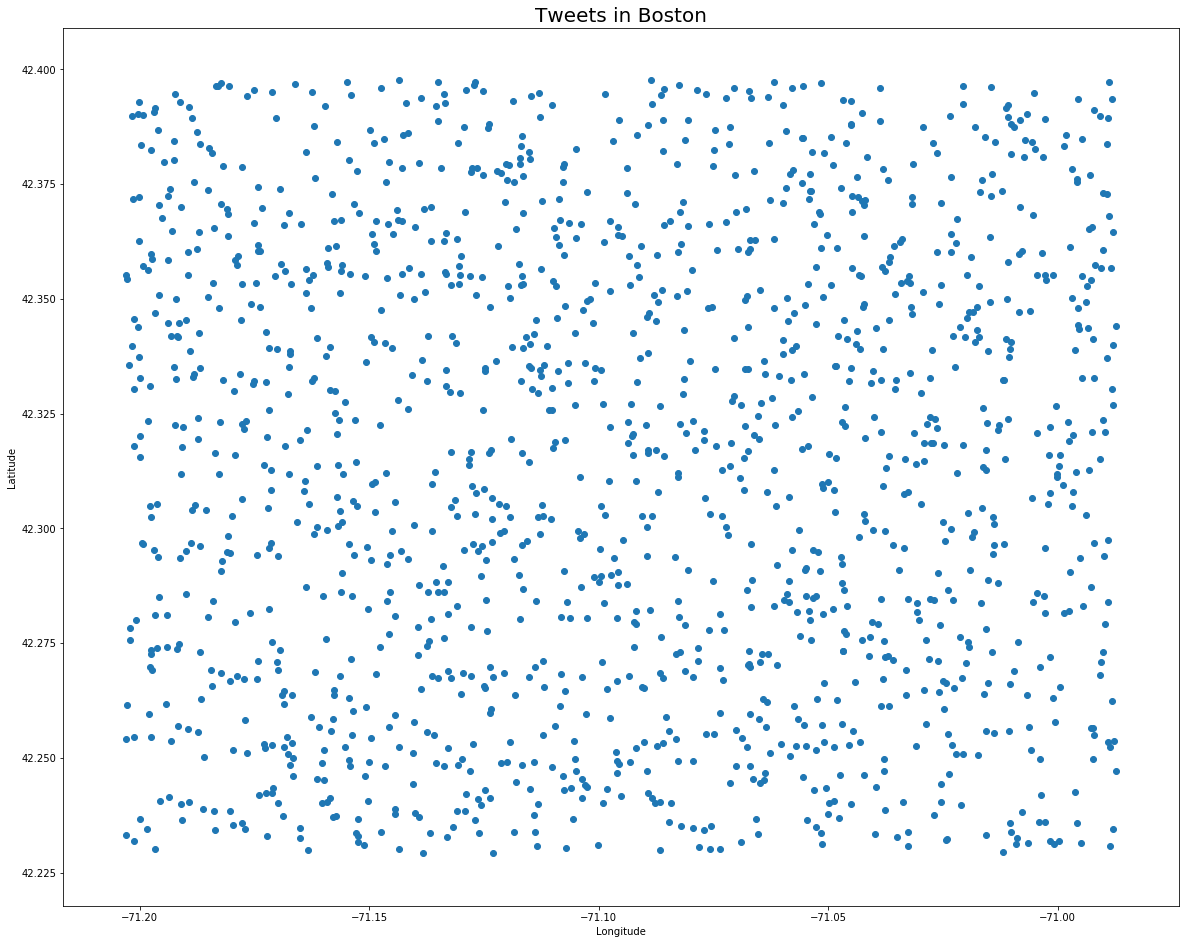

In [12]:
clean_gdf.plot(figsize = (20,20));
plt.title('Tweets in Boston', fontsize = 20);
plt.xlabel('Longitude', fontsize = 10);
plt.ylabel('Latitude', fontsize = 10);

In [13]:

# only keep those points within polygons
boston_points = clean_gdf[clean_gdf['geometry'].within(geo_df['geometry'].unary_union)]

In [14]:
color_dict = {1: 'red',0:'green'}
boston_points['color'] = boston_points['target'].map(color_dict)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


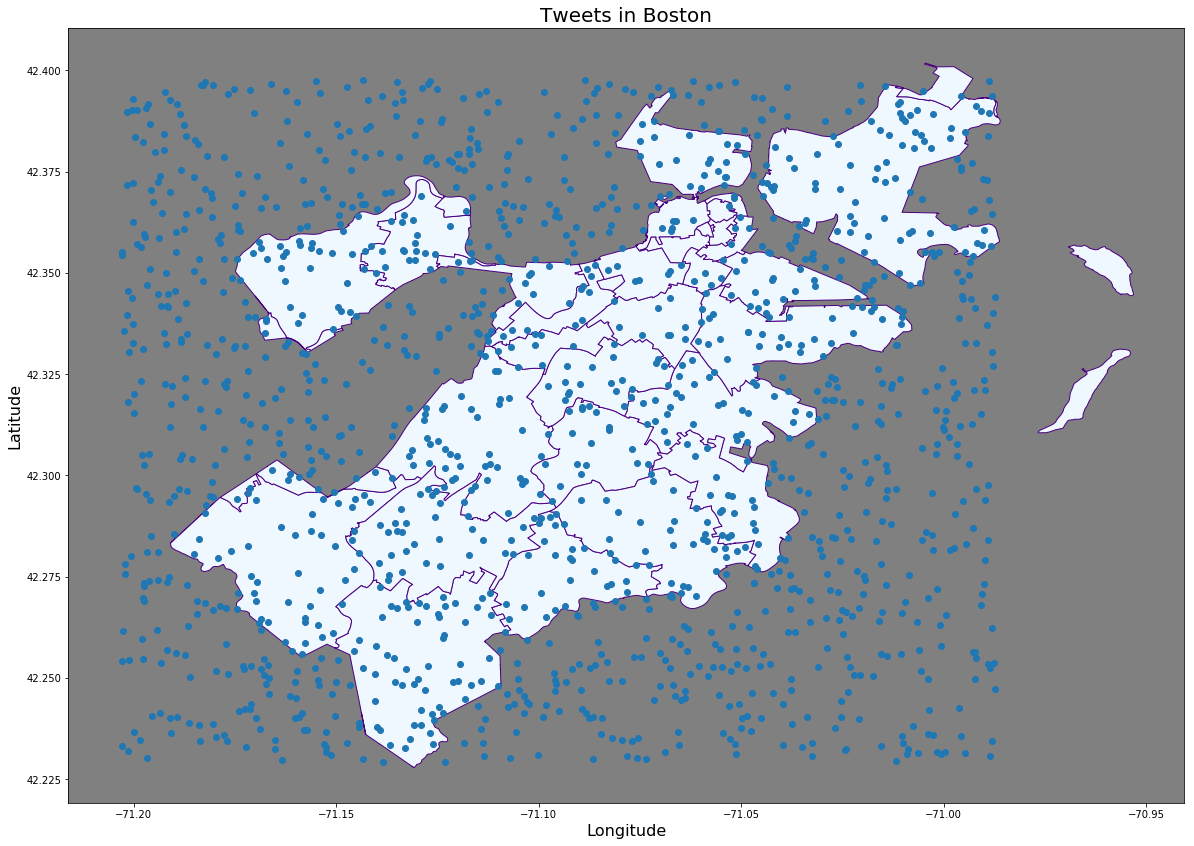

In [15]:
fig, ax = plt.subplots(figsize = (20,20))
geo_df.plot(ax = ax, facecolor = 'aliceblue', edgecolor = 'indigo');
clean_gdf.plot(ax = ax);
ax.set_title('Tweets in Boston', fontsize = 20)
ax.set_facecolor('grey')
ax.set_xlabel('Longitude', fontsize = 16);
ax.set_ylabel('Latitude', fontsize = 16);

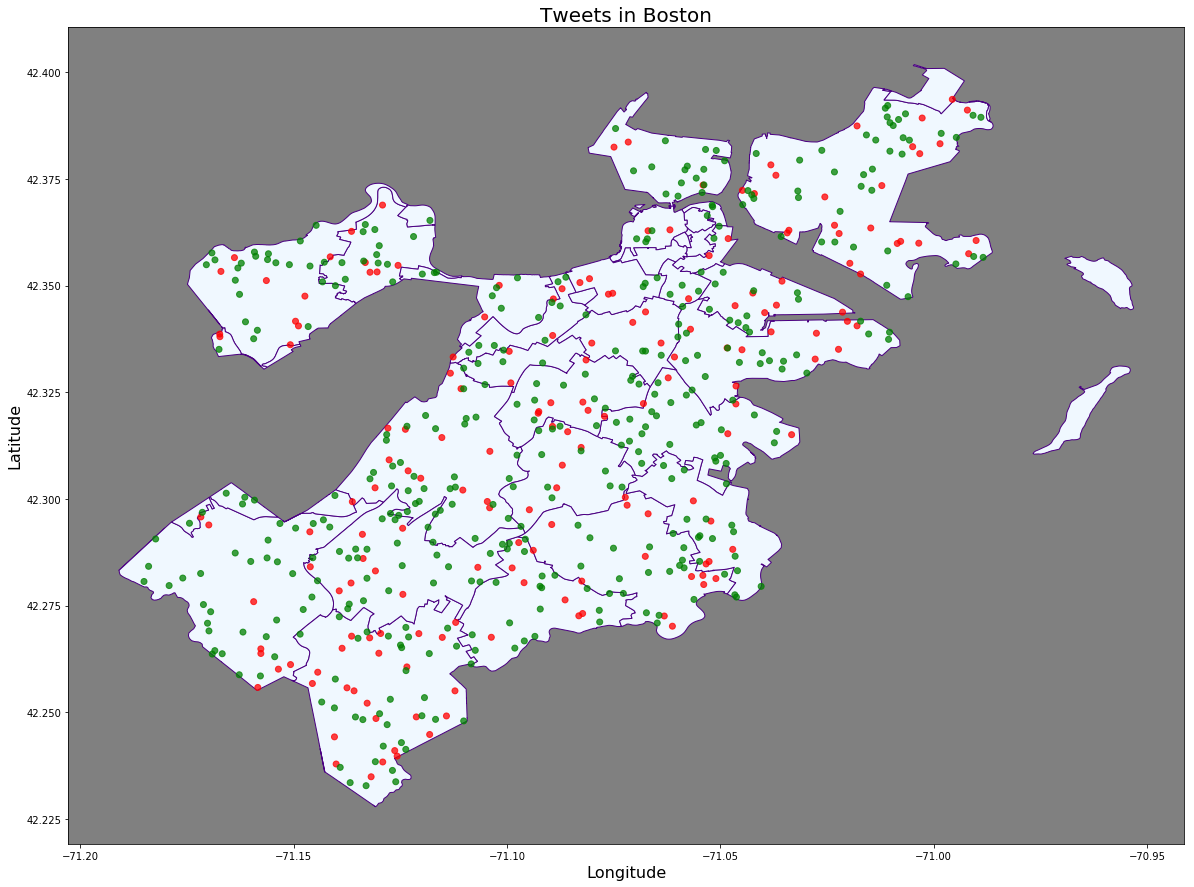

In [16]:
fig, ax = plt.subplots(figsize = (20,20))
geo_df.plot(ax = ax, facecolor = 'aliceblue', edgecolor = 'indigo');
boston_points.plot(ax = ax, c = boston_points['color'], alpha = 0.75);
ax.set_title('Tweets in Boston', fontsize = 20)
ax.set_facecolor('grey')
ax.set_xlabel('Longitude', fontsize = 16);
ax.set_ylabel('Latitude', fontsize = 16);